In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/eclarson/DataMiningNotebooks/master/data/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
print(df.dtypes) ##gets datatypes of each attribute
print(df.info()) ##finds nulls per attribute

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2

In [3]:
len(df[df.Survived==0])/len(df)*100 ##total percentage of individuals who survived titanic

61.61616161616161

In [4]:
## aggregates by class
df_grouped = df.groupby(by="Pclass")
print(df_grouped.Survived.sum())
print('___________________________')
print(df_grouped.Survived.count())
print('___________________________')
print(df_grouped.Survived.sum()/df_grouped.Survived.count())

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64
___________________________
Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64
___________________________
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


# Feature Discretization

In [5]:
## break the age variable using cut
df['age_range'] = pd.cut(df.Age,[0,16,65,1e6],3,labels=['child', 'adult', 'senior'])
df.age_range.describe()

count       714
unique        3
top       adult
freq        606
Name: age_range, dtype: object

In [6]:
## group with the new variable
df_grouped = df.groupby(by=['Pclass', 'age_range'])
print("Percentage of survivors in each group:")
print(df_grouped.Survived.sum()/df_grouped.Survived.count()*100)

Percentage of survivors in each group:
Pclass  age_range
1       child        88.888889
        adult        65.317919
        senior       25.000000
2       child        90.476190
        adult        42.666667
        senior        0.000000
3       child        40.000000
        adult        20.141343
        senior        0.000000
Name: Survived, dtype: float64


In [7]:
#remove unesufl attributes
for col in ['PassengerId', 'Name', 'Cabin', 'Ticket']:
    if col in df:
        del df[col]
        
print(df)

     Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked age_range
0           0       3    male  22.0      1      0   7.2500        S     adult
1           1       1  female  38.0      1      0  71.2833        C     adult
2           1       3  female  26.0      0      0   7.9250        S     adult
3           1       1  female  35.0      1      0  53.1000        S     adult
4           0       3    male  35.0      0      0   8.0500        S     adult
..        ...     ...     ...   ...    ...    ...      ...      ...       ...
886         0       2    male  27.0      0      0  13.0000        S     adult
887         1       1  female  19.0      0      0  30.0000        S     adult
888         0       3  female   NaN      1      2  23.4500        S       NaN
889         1       1    male  26.0      0      0  30.0000        C     adult
890         0       3    male  32.0      0      0   7.7500        Q     adult

[891 rows x 9 columns]


In [8]:
# impute missing values by the grouped pclass and sibsp numbers
df_grouped = df.groupby(by=['Pclass', 'SibSp'])
print(df_grouped.describe())

             Survived                                                 Age  \
                count      mean       std  min  25%  50%  75%  max  count   
Pclass SibSp                                                                
1      0        137.0  0.562044  0.497956  0.0  0.0  1.0  1.0  1.0  113.0   
       1         71.0  0.746479  0.438123  0.0  0.5  1.0  1.0  1.0   65.0   
       2          5.0  0.800000  0.447214  0.0  1.0  1.0  1.0  1.0    5.0   
       3          3.0  0.666667  0.577350  0.0  0.5  1.0  1.0  1.0    3.0   
2      0        120.0  0.416667  0.495074  0.0  0.0  0.0  1.0  1.0  109.0   
       1         55.0  0.581818  0.497807  0.0  0.0  1.0  1.0  1.0   55.0   
       2          8.0  0.500000  0.534522  0.0  0.0  0.5  1.0  1.0    8.0   
       3          1.0  1.000000       NaN  1.0  1.0  1.0  1.0  1.0    1.0   
3      0        351.0  0.236467  0.425519  0.0  0.0  0.0  0.0  1.0  249.0   
       1         83.0  0.325301  0.471335  0.0  0.0  0.0  1.0  1.0   63.0   

In [9]:
##use this group to fill data set in group and transform back
df_imputed = df_grouped.transform(lambda grp: grp.fillna(grp.median()))
df_imputed[['Pclass', 'SibSp', 'Sex', 'Embarked']] = df[['Pclass','SibSp','Sex','Embarked']]
print(df_imputed.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       884 non-null    float64
 2   Parch     891 non-null    int64  
 3   Fare      891 non-null    float64
 4   Pclass    891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Sex       891 non-null    object 
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
None


/tmp/ipykernel_4524/2283617627.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  df_imputed = df_grouped.transform(lambda grp: grp.fillna(grp.median()))
/tmp/ipykernel_4524/2283617627.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  df_imputed = df_grouped.transform(lambda grp: grp.fillna(grp.median()))


In [10]:
# compute discreate features again now with the nwest values
df_imputed['age_range']=pd.cut(df_imputed.Age, [0,16,65,1e6],3, labels=['child', 'adult', 'senior'])
print(df_imputed.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Survived   891 non-null    int64   
 1   Age        884 non-null    float64 
 2   Parch      891 non-null    int64   
 3   Fare       891 non-null    float64 
 4   Pclass     891 non-null    int64   
 5   SibSp      891 non-null    int64   
 6   Sex        891 non-null    object  
 7   Embarked   889 non-null    object  
 8   age_range  884 non-null    category
dtypes: category(1), float64(2), int64(4), object(2)
memory usage: 56.8+ KB
None


In [11]:
# drop rows that still have NAs
df_imputed.dropna(inplace=True)
df_imputed =df_imputed[['Survived', 'Age', 'age_range', 'Sex', 'Parch', 'SibSp', 'Pclass' , 'Fare', 'Embarked']]
print(df_imputed.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 882 entries, 0 to 890
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Survived   882 non-null    int64   
 1   Age        882 non-null    float64 
 2   age_range  882 non-null    category
 3   Sex        882 non-null    object  
 4   Parch      882 non-null    int64   
 5   SibSp      882 non-null    int64   
 6   Pclass     882 non-null    int64   
 7   Fare       882 non-null    float64 
 8   Embarked   882 non-null    object  
dtypes: category(1), float64(2), int64(4), object(2)
memory usage: 63.0+ KB
None


In [12]:
## chceck to see if much changed
df_grouped =df_imputed.groupby(by=['Pclass', 'age_range'])
print("Percentage of survivors in each group, with imputed values:")
print(df_grouped.Survived.sum()/df_grouped.Survived.count()*100)

Percentage of survivors in each group, with imputed values:
Pclass  age_range
1       child        88.888889
        adult        62.189055
        senior       25.000000
2       child        90.476190
        adult        42.236025
        senior        0.000000
3       child        37.837838
        adult        22.303922
        senior        0.000000
Name: Survived, dtype: float64


In [13]:
df_sub = df_imputed[['Survived', 'Age', 'Pclass', 'Fare']]
df_normalized = (df_sub-df_sub.min())/(df_sub.max()-df_sub.min())

# Visualizing in Pandas

In [14]:
## use magics to plot embedded into the notebook
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

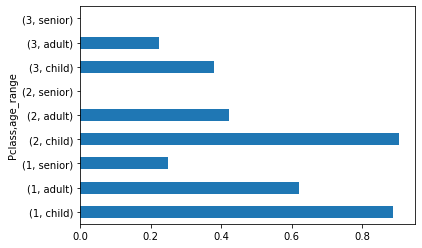

In [15]:
df_grouped = df_imputed.groupby(by=['Pclass','age_range'])
survival_rate = df_grouped.Survived.sum()/df_grouped.Survived.count()
ax = survival_rate.plot(kind='barh')

In [16]:
## same thing as grouping and dividing done with cross tabulation of pandas
survival = pd.crosstab([df_imputed['Pclass'],df_imputed['age_range']],df_imputed.Survived.astype(bool))
print(survival)

Survived          False  True
Pclass age_range             
1      child          1     8
       adult         76   125
       senior         3     1
2      child          2    19
       adult         93    68
       senior         2     0
3      child         46    28
       adult        317    91
       senior         2     0


Survived             False      True
Pclass age_range                    
1      child      0.111111  0.888889
       adult      0.378109  0.621891
       senior     0.750000  0.250000
2      child      0.095238  0.904762
       adult      0.577640  0.422360
       senior     1.000000  0.000000
3      child      0.621622  0.378378
       adult      0.776961  0.223039
       senior     1.000000  0.000000


<AxesSubplot:ylabel='Pclass,age_range'>

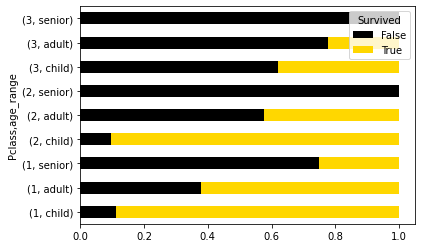

In [17]:
survival_rate = survival.div(survival.sum(1).astype(float),axis=0)
print(survival_rate)
survival_rate.plot(kind='barh',stacked=True, color=['black','gold'])

<AxesSubplot:title={'center':'Fare'}, xlabel='Pclass'>

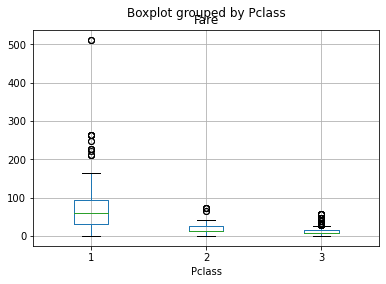

In [18]:
df_imputed.boxplot(column='Fare', by='Pclass')

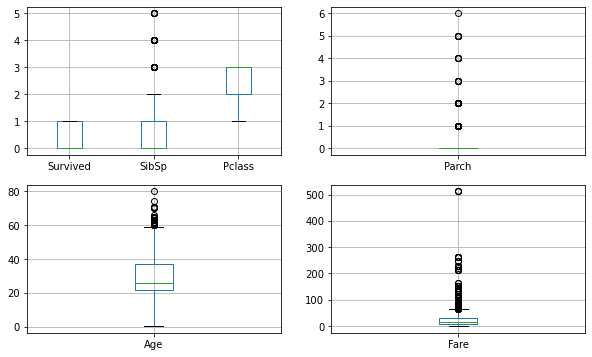

In [38]:
# lets look at the boxplots separately
vars_to_plot_separate = [['Survived','SibSp','Pclass'],
                         ['Parch'],
                         ['Age'],
                         ['Fare'] ]
plt.figure(figsize=(10, 6))

for index, plot_vars in enumerate(vars_to_plot_separate):
    plt.subplot(int(len(vars_to_plot_separate)/2), 
                2, 
                index+1)
    ax = df_imputed.boxplot(column=plot_vars)
    
plt.show()


<Figure size 288x288 with 0 Axes>

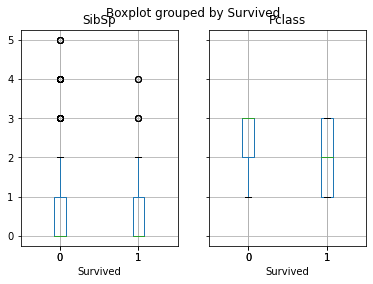

<Figure size 288x288 with 0 Axes>

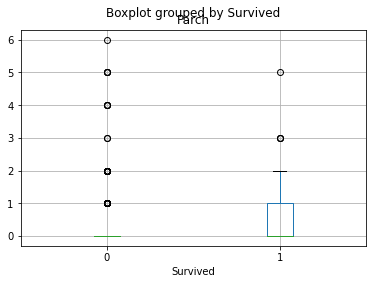

<Figure size 288x288 with 0 Axes>

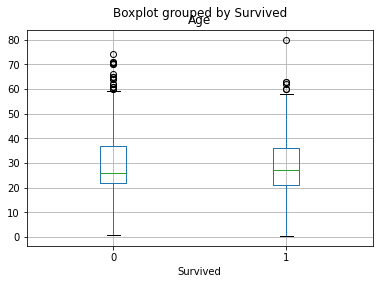

<Figure size 288x288 with 0 Axes>

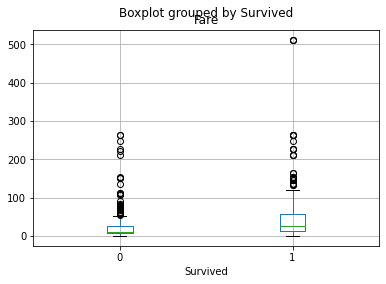

In [40]:
vars_to_plot_separate = [['SibSp', 'Pclass'],
                        ['Parch'],
                        ['Age'],
                        ['Fare']]
for index, plot_vars in enumerate(vars_to_plot_separate):
    plt.figure(figsize=(4,4))
    ax=df_imputed.boxplot(column=plot_vars,by='Survived')
plt.show()

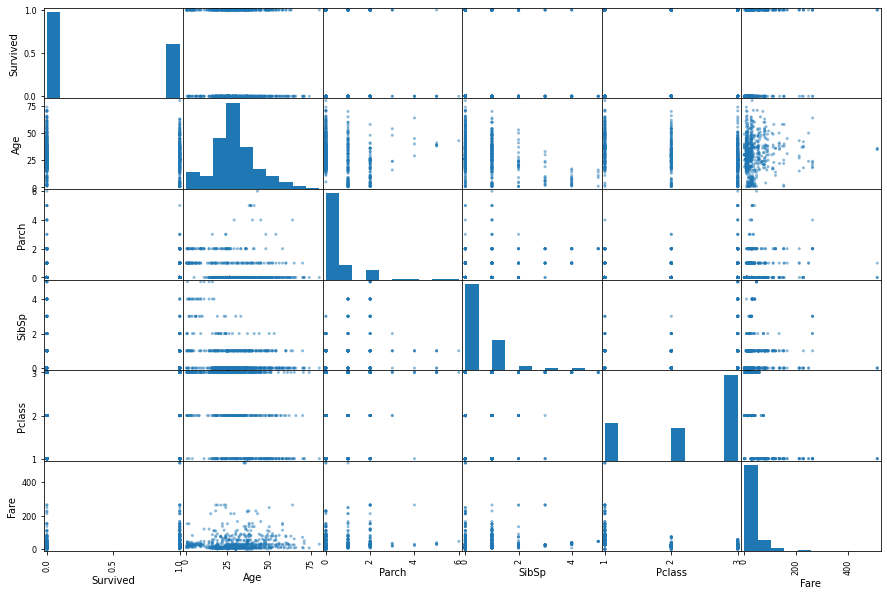

In [47]:
from pandas.plotting import scatter_matrix

ax = scatter_matrix(df_imputed,figsize=(15, 10))